In [ ]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense, LSTM, Bidirectional

https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce

In [ ]:
# Define 10 restaurant reviews
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]

#Define labels
labels = array([1,1,1,1,1,0,0,0,0,0])

In [ ]:
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

encoded reviews: [[2, 9, 32], [12, 25], [28, 7], [29, 15], [12, 15], [16], [16, 41], [26], [38, 43], [46, 4, 38, 29]]


In [ ]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

[[ 2  9 32  0]
 [12 25  0  0]
 [28  7  0  0]
 [29 15  0  0]
 [12 15  0  0]
 [16  0  0  0]
 [16 41  0  0]
 [26  0  0  0]
 [38 43  0  0]
 [46  4 38 29]]


In [ ]:
model = Sequential()

model.add(Embedding(input_dim=Vocab_size, output_dim=embedding_dim))
model.add(Bidirectional(LSTM(10, return_sequences=True)))
model.add(Bidirectional(LSTM(5)) )
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 4, 8)              400       
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 20)            1520      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 10)               1040      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,971
Trainable params: 2,971
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model = Sequential()
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length)
model.add(embedding_layer)
# model.add(Bidirectional(LSTM(10, return_sequences=True)))
# model.add(Bidirectional(LSTM(5)) )
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs=10
batch_size = 2
history = model.fit(padded_reviews,labels, batch_size ,epochs)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6892 - acc: 0.5000
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6834 - acc: 0.6000
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6784 - acc: 0.7000
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6735 - acc: 0.8000
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6681 - acc: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6630 - acc: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6580 - acc: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6525 - acc: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6469 - acc: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6412 - acc: 1.0000


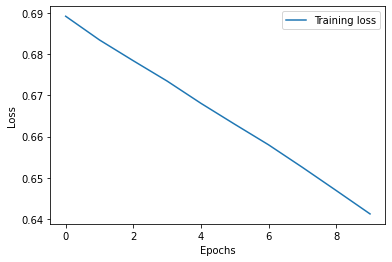

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history

loss = history_dict['loss']


# "bo" is for "blue dot"
plt.plot( loss,  label='Training loss')
# b is for "solid blue line"
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()